In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_path = '/content/drive/MyDrive/sfds/project_2/'
olist_customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

In [ ]:
olist_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
most_sellers_count = olist_sellers.groupby(["seller_city",
                                                                      "seller_state"]).size().reset_index(
                                                                                                          name='count'
                                                                                                          )

most_sellers_count_sorted = most_sellers_count.sort_values(by='count', ascending=False)
print(most_sellers_count_sorted)

        seller_city seller_state  count
540       sao paulo           SP    694
164        curitiba           PR    124
470  rio de janeiro           RJ     93
65   belo horizonte           MG     66
461  ribeirao preto           SP     52
..              ...          ...    ...
270   itau de minas           MG      1
267          itapui           SP      1
266      itaporanga           SP      1
264         itapeva           SP      1
635           xaxim           SC      1

[636 rows x 3 columns]


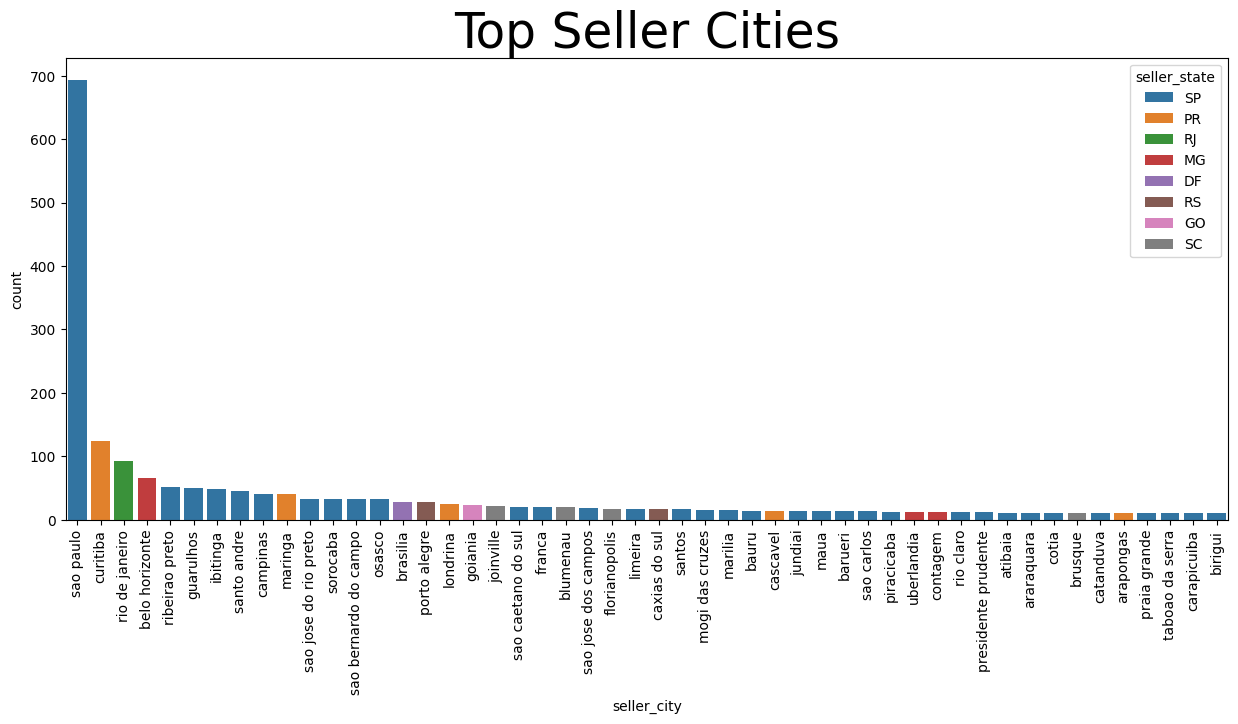

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Top Seller Cities",fontsize=35)

sns.barplot(data=most_sellers_count_sorted.head(50),x="seller_city",y="count",hue="seller_state")
plt.xticks(rotation=90)
plt.show()

## Findings

> Sau Paulo is among the world's most populous city.

> Population around 2.28 Crores

In [ ]:
olist_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
popular_product = olist_products.groupby("product_category_name").size().reset_index(name='count')
popular_product_sorted = popular_product.sort_values(by='count', ascending=False)
print(popular_product_sorted)

            product_category_name  count
13                cama_mesa_banho   3029
32                  esporte_lazer   2867
54               moveis_decoracao   2657
11                   beleza_saude   2444
72          utilidades_domesticas   2335
..                            ...    ...
15                casa_conforto_2      5
37  fashion_roupa_infanto_juvenil      5
60                       pc_gamer      3
67             seguros_e_servicos      2
17              cds_dvds_musicais      1

[73 rows x 2 columns]


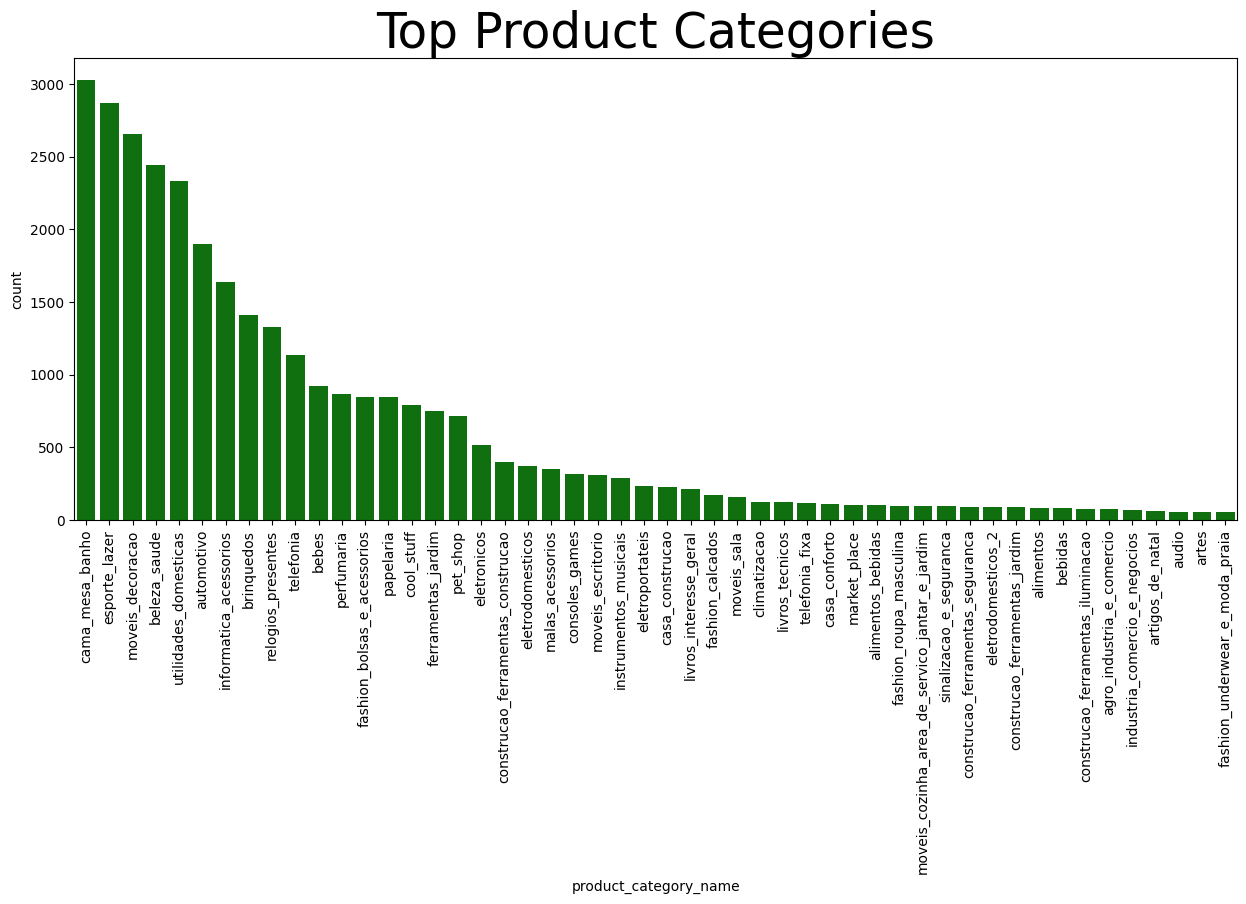

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Top Product Categories",fontsize=35)

sns.barplot(data=popular_product_sorted.head(50),x="product_category_name",y="count",color="green")
plt.xticks(rotation=90)
plt.show()

> Most Popular Product Category is `cama mes e banho`

> It translates to `bed, table, and bath`. They are basic household items and furnishings needed for a home, including bedding, kitchenware, and bath towels and accessories.

In [ ]:

olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


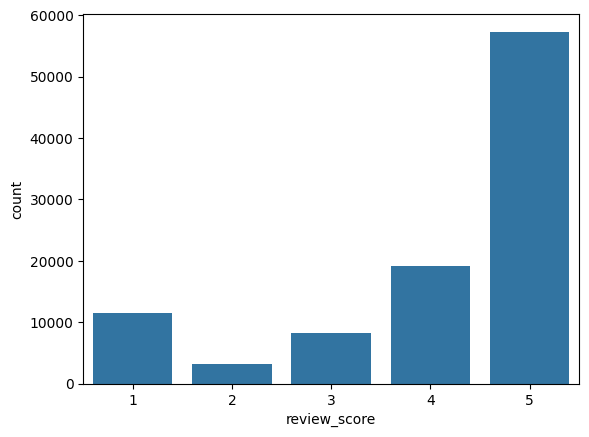

In [ ]:

reviews = olist_order_reviews.review_score.value_counts()
sns.barplot(x=reviews.index,y=reviews)
plt.show()

In [ ]:
olist_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
olist_order_payments_5 = olist_order_payments[olist_order_payments["payment_sequential"]<=5]

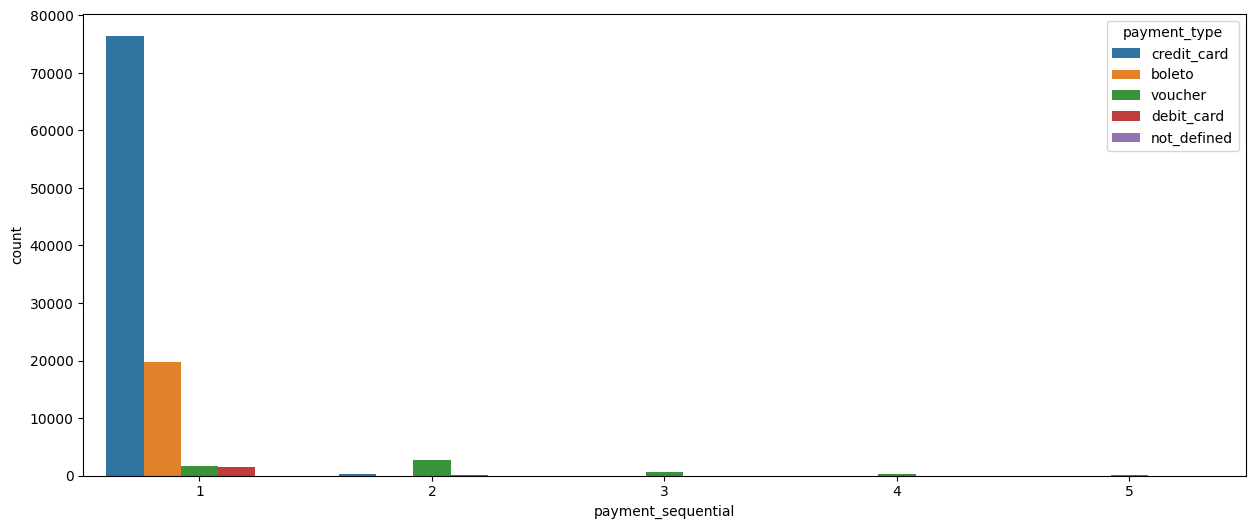

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=olist_order_payments_5,x="payment_sequential",hue="payment_type")
plt.show()

In [ ]:
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
olist_orders["order_delivered_customer_date"] = pd.to_datetime(olist_orders["order_delivered_customer_date"])
olist_orders["order_estimated_delivery_date"] = pd.to_datetime(olist_orders["order_estimated_delivery_date"])

In [ ]:
olist_orders['days_difference'] = (olist_orders['order_estimated_delivery_date'] - olist_orders['order_delivered_customer_date']).dt.days

In [ ]:
olist_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_difference
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0


In [ ]:
olist_orders.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

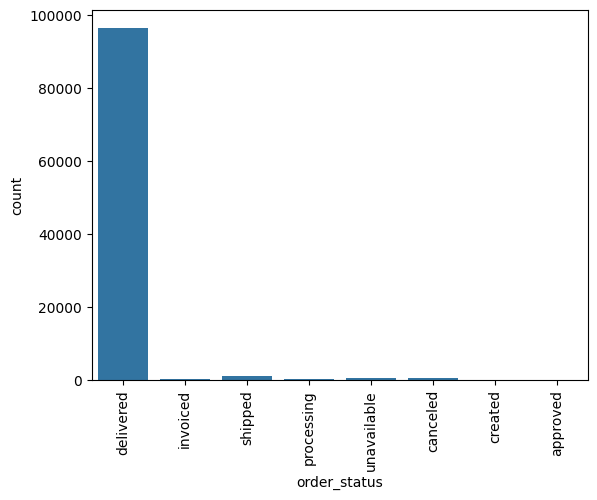

In [ ]:
sns.countplot(x=olist_orders["order_status"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
olist_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
olist_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
olist_orders = olist_orders.merge(olist_customer[["customer_id","customer_state"]],on="customer_id",how="left")

In [ ]:
len(olist_orders),len(olist_customer)

(99441, 99441)

In [ ]:
most_customers = olist_customer.groupby(["customer_city",
                                                                      "customer_state"]).size().reset_index(
                                                                                                          name='count'
                                                                                                          )

most_customers_sorted = most_customers.sort_values(by='count', ascending=False)
print(most_customers_sorted)

         customer_city customer_state  count
3758         sao paulo             SP  15540
3281    rio de janeiro             RJ   6882
469     belo horizonte             MG   2773
587           brasilia             DF   2131
1187          curitiba             PR   1521
...                ...            ...    ...
1356  ewbank da camara             MG      1
2307  marechal deodoro             AL      1
1360          fagundes             PB      1
1361             farol             PR      1
2605  nova laranjeiras             PR      1

[4310 rows x 3 columns]


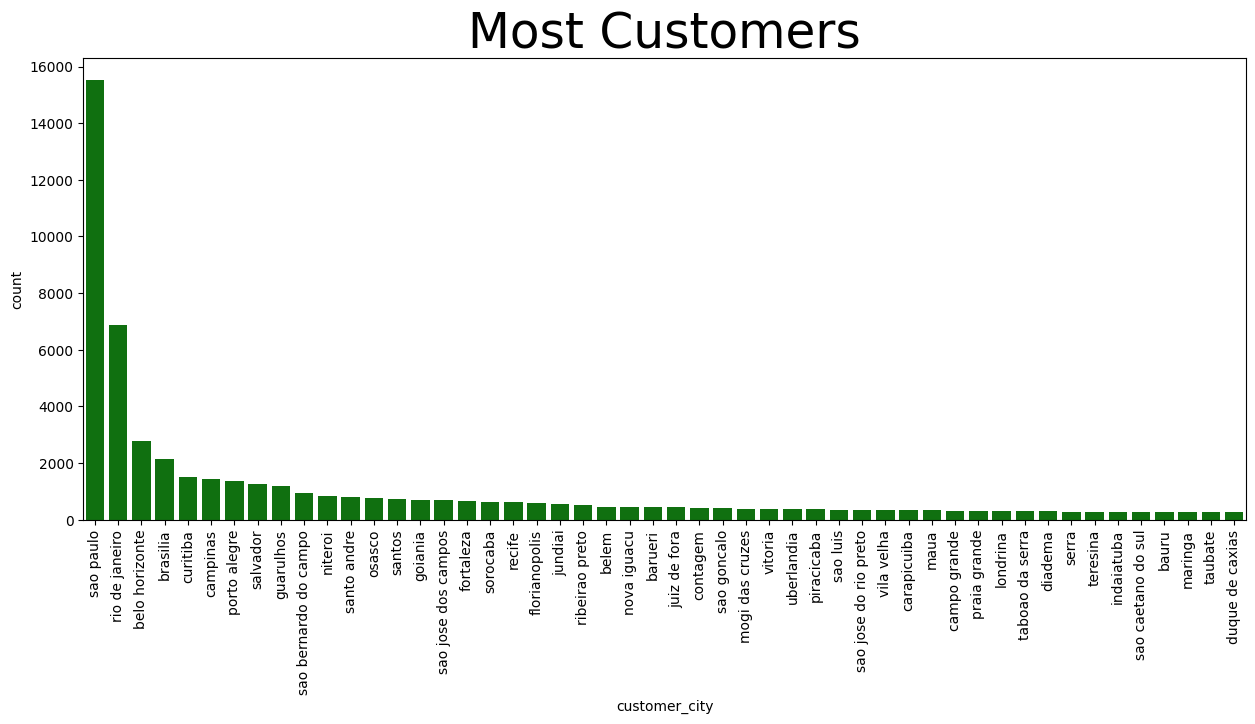

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Most Customers",fontsize=35)

sns.barplot(data=most_customers_sorted.head(50),x="customer_city",y="count",color="green")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = olist_order_reviews.copy()

In [ ]:
df1 = olist_order_items.merge(olist_products[['product_id', 'product_category_name']], on='product_id', how='left')

In [ ]:
df = df.merge(df1[["order_id","product_category_name"]],on="order_id",how="left")

In [ ]:
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,esporte_lazer
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,esporte_lazer
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,informatica_acessorios
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,informatica_acessorios
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,ferramentas_jardim


In [ ]:
df = df.merge(olist_orders[["order_id","order_status","days_difference","customer_state"]],on="order_id",how="left")

In [ ]:
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,order_status,days_difference,customer_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,esporte_lazer,delivered,15.0,SP
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,esporte_lazer,delivered,15.0,SP
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,informatica_acessorios,delivered,4.0,SP
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,informatica_acessorios,delivered,20.0,BA
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,ferramentas_jardim,delivered,19.0,SC
...,...,...,...,...,...,...,...,...,...,...,...
113126,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,moveis_decoracao,delivered,13.0,GO
113127,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,brinquedos,delivered,11.0,RJ
113128,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,papelaria,delivered,15.0,MG
113129,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,esporte_lazer,delivered,15.0,MG


In [ ]:
df.rename(columns={
    "days_difference":"delivery_days"
},inplace=True)

In [ ]:
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,order_status,delivery_days,customer_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,esporte_lazer,delivered,15.0,SP
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,esporte_lazer,delivered,15.0,SP
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,informatica_acessorios,delivered,4.0,SP
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,informatica_acessorios,delivered,20.0,BA
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,ferramentas_jardim,delivered,19.0,SC
...,...,...,...,...,...,...,...,...,...,...,...
113126,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,moveis_decoracao,delivered,13.0,GO
113127,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,brinquedos,delivered,11.0,RJ
113128,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,papelaria,delivered,15.0,MG
113129,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,esporte_lazer,delivered,15.0,MG


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113131 entries, 0 to 113130
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   review_id                113131 non-null  object 
 1   order_id                 113131 non-null  object 
 2   review_score             113131 non-null  int64  
 3   review_comment_title     13523 non-null   object 
 4   review_comment_message   48166 non-null   object 
 5   review_creation_date     113131 non-null  object 
 6   review_answer_timestamp  113131 non-null  object 
 7   product_category_name    110774 non-null  object 
 8   order_status             113131 non-null  object 
 9   delivery_days            110012 non-null  float64
 10  customer_state           113131 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 9.5+ MB


In [ ]:
print(df.columns)

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name', 'order_status',
       'delivery_days', 'customer_state'],
      dtype='object')


In [ ]:
df.describe()

,review_score,delivery_days
count,113131.000000,110012.000000
mean,4.016998,11.070738
std,1.400074,10.092261
min,1.000000,-189.000000
25%,4.000000,6.000000
50%,5.000000,12.000000
75%,5.000000,16.000000
max,5.000000,146.000000


In [ ]:
len(df)

113131

In [ ]:
df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       99608
review_comment_message     64965
review_creation_date           0
review_answer_timestamp        0
product_category_name       2357
order_status                   0
delivery_days               3119
customer_state                 0
dtype: int64

In [ ]:
# Check reviews where comment title is missing
missing_title = df[df["review_comment_title"].isna()==True]

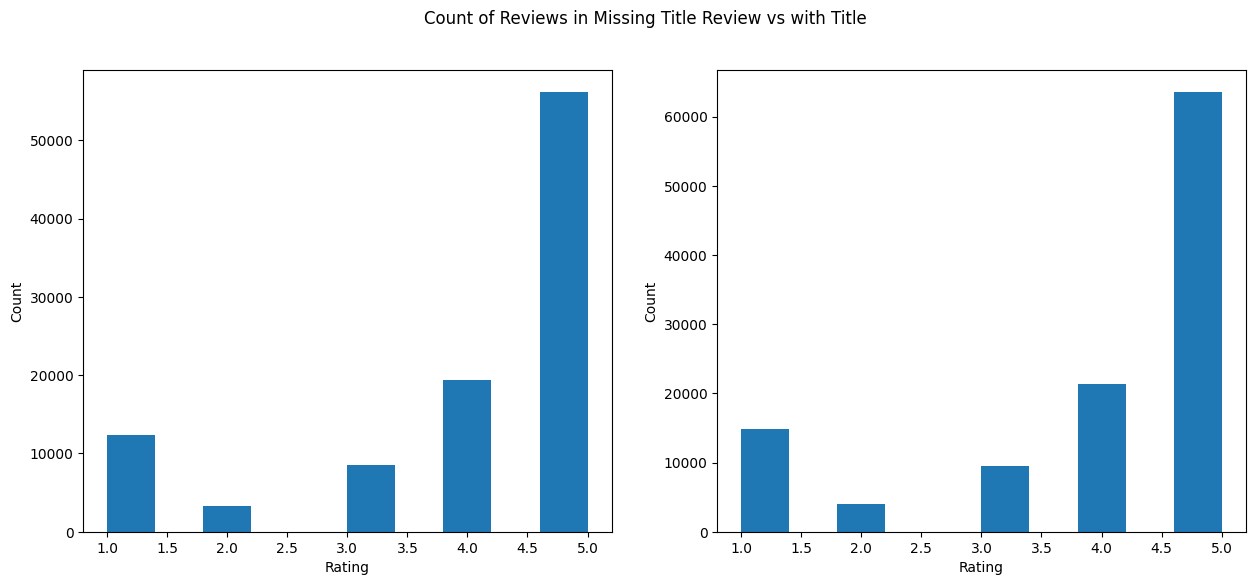

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
plt.suptitle("Count of Reviews in Missing Title Review vs with Title")

ax[0].hist(missing_title["review_score"])
ax[0].set_xlabel("Rating")
ax[0].set_ylabel("Count")

ax[1].hist(df["review_score"])
ax[1].set_xlabel("Rating")
ax[1].set_ylabel("Count")

plt.show()

In [ ]:
# Drop unnecessary features

features_to_drop = ["review_id","order_id","review_creation_date" ,"review_answer_timestamp"]
df.drop(features_to_drop,axis=1,inplace=True)

In [ ]:
df.head()

,review_score,review_comment_title,review_comment_message,product_category_name,order_status,delivery_days,customer_state
0,4,NaN,NaN,esporte_lazer,delivered,15.0,SP
1,4,NaN,NaN,esporte_lazer,delivered,15.0,SP
2,5,NaN,NaN,informatica_acessorios,delivered,4.0,SP
3,5,NaN,NaN,informatica_acessorios,delivered,20.0,BA
4,5,NaN,Recebi bem antes do prazo estipulado.,ferramentas_jardim,delivered,19.0,SC


<Axes: xlabel='delivery_days', ylabel='review_score'>

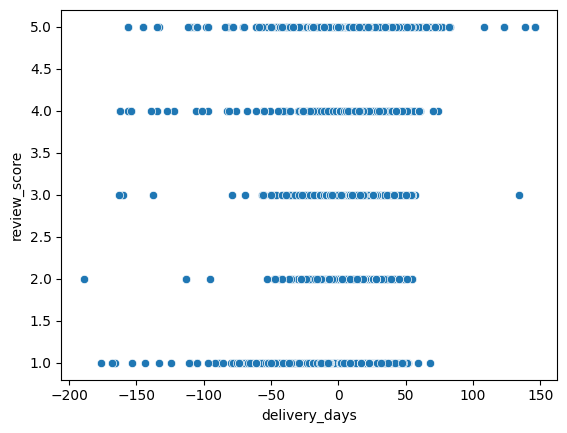

In [ ]:
sns.scatterplot(data=df,x="delivery_days",y="review_score")

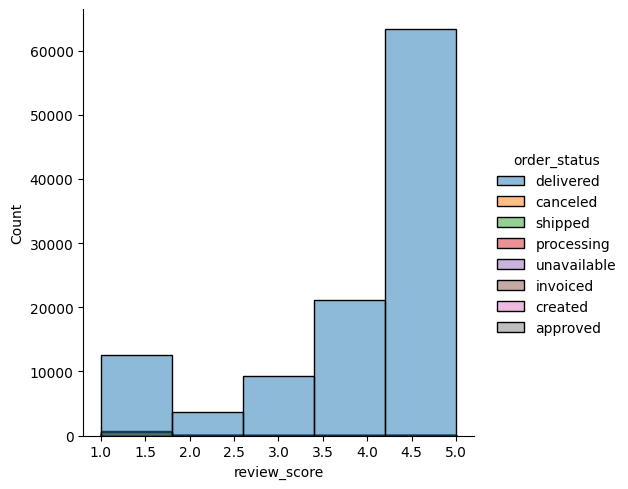

In [ ]:
sns.displot(data=df,x="review_score",hue="order_status",bins=5)

(0.0, 20000.0)

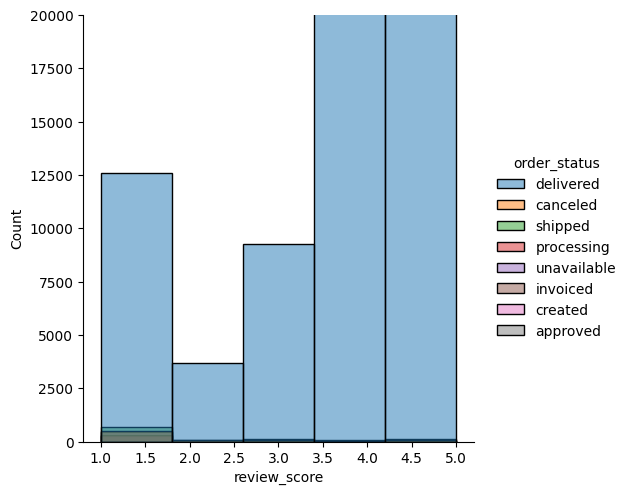

In [ ]:
sns.displot(data=df,x="review_score",hue="order_status",bins=5)
plt.ylim(0,20000)

In [ ]:
pd.crosstab(df["review_score"],df["customer_state"])

customer_state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
review_score,,,,,,,,,,,,,,,,,,,,,
1,7,83,16,4,608,255,335,304,298,157,...,665,2756,65,30,11,782,561,72,5312,28
2,8,28,15,2,166,68,82,65,83,38,...,205,592,16,22,2,209,144,14,1526,14
3,8,32,7,8,403,138,192,202,222,87,...,446,1193,40,29,8,507,379,31,3877,28
4,15,95,32,25,801,289,480,469,487,165,...,1109,2375,102,49,8,1261,792,70,8993,72
5,54,209,95,42,1809,731,1340,1205,1239,383,...,3358,7641,306,153,23,3537,2305,201,28056,173


In [ ]:
pd.crosstab(df["review_score"],df["product_category_name"])

product_category_name,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
review_score,,,,,,,,,,,,,,,,,,,,,
1,27,51,17,31,3,8,19,60,497,406,...,192,7,3,751,1,20,5,580,50,837
2,7,13,5,7,0,2,2,19,146,103,...,59,1,2,216,0,3,6,181,17,249
3,13,26,29,18,3,5,12,35,322,260,...,143,4,3,532,0,29,6,460,19,594
4,57,92,50,39,3,5,37,57,867,559,...,349,14,2,1120,1,33,21,974,56,1278
5,108,313,178,112,15,23,76,190,2381,1720,...,1196,50,5,3331,0,112,43,2322,120,3985


In [ ]:
def check_score(status):
  print(f"Count of 1 review score when the status was {status} => {len(df[(df['review_score']==1) & (df['order_status']==status)])}")

for status in df["order_status"].value_counts().index.tolist():
  check_score(status)

Count of 1 review score when the status was delivered => 12575
Count of 1 review score when the status was shipped => 690
Count of 1 review score when the status was canceled => 481
Count of 1 review score when the status was unavailable => 464
Count of 1 review score when the status was invoiced => 264
Count of 1 review score when the status was processing => 297
Count of 1 review score when the status was created => 2
Count of 1 review score when the status was approved => 2


In [ ]:
def check_score(status):
  print(f"Count of positive review score when the status was {status} => {len(df[(df['review_score']>3) & (df['order_status']==status)])}")

for status in df["order_status"].value_counts().index.tolist():
  check_score(status)

Count of positive review score when the status was delivered => 84496
Count of positive review score when the status was shipped => 219
Count of positive review score when the status was canceled => 104
Count of positive review score when the status was unavailable => 56
Count of positive review score when the status was invoiced => 47
Count of positive review score when the status was processing => 20
Count of positive review score when the status was created => 1
Count of positive review score when the status was approved => 1


In [ ]:
df['review_text'] = df['review_comment_title'].fillna('') + ' ' + df['review_comment_message'].fillna('')

In [ ]:
df.drop(["review_comment_title","review_comment_message"],axis=1,inplace=True)

In [ ]:
df

,review_score,product_category_name,order_status,delivery_days,customer_state,review_text
0,4,esporte_lazer,delivered,15.0,SP,
1,4,esporte_lazer,delivered,15.0,SP,
2,5,informatica_acessorios,delivered,4.0,SP,
3,5,informatica_acessorios,delivered,20.0,BA,
4,5,ferramentas_jardim,delivered,19.0,SC,Recebi bem antes do prazo estipulado.
...,...,...,...,...,...,...
113126,5,moveis_decoracao,delivered,13.0,GO,
113127,5,brinquedos,delivered,11.0,RJ,
113128,5,papelaria,delivered,15.0,MG,"Excelente mochila, entrega super rápida. Supe..."
113129,4,esporte_lazer,delivered,15.0,MG,


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# # tokenizer - tool that breaks down a text into smaller units, typically words or subwordss.
# each words into tokens which individually has their own meaning

In [ ]:
stop_words = set(stopwords.words('english')) | set(stopwords.words('portuguese')) | set(string.punctuation)

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    processed_text = ' '.join(filtered_tokens)
    return processed_text

df['processed_review_text'] = df['review_text'].apply(lambda x: preprocess_text(str(x)))

In [ ]:
df.head(25)

,review_score,product_category_name,order_status,delivery_days,customer_state,review_text,processed_review_text
0,4,esporte_lazer,delivered,15.0,SP,,
1,4,esporte_lazer,delivered,15.0,SP,,
2,5,informatica_acessorios,delivered,4.0,SP,,
3,5,informatica_acessorios,delivered,20.0,BA,,
4,5,ferramentas_jardim,delivered,19.0,SC,Recebi bem antes do prazo estipulado.,recebi bem antes prazo estipulado
5,5,esporte_lazer,delivered,8.0,SC,Parabéns lojas lannister adorei comprar pela ...,parabéns lojas lannister adorei comprar intern...
6,1,cama_mesa_banho,delivered,20.0,SP,,
7,1,cama_mesa_banho,delivered,20.0,SP,,
8,1,cama_mesa_banho,delivered,20.0,SP,,
9,1,cama_mesa_banho,delivered,20.0,SP,,


In [ ]:
most_frequent_positive_reviews = {}

positive_review_words = df[(df["review_score"]>3) & (df["processed_review_text"].str.len()>0)]["processed_review_text"]
pos = positive_review_words.tolist()

for i in pos:
  for j in i.split():
    if j in most_frequent_positive_reviews:
      most_frequent_positive_reviews[j]+=1
    else:
      most_frequent_positive_reviews[j]=1

In [ ]:
most_frequent_positive_reviews_df = pd.DataFrame({"words":list(most_frequent_positive_reviews.keys()),"count":list(most_frequent_positive_reviews.values())})
most_frequent_positive_reviews_df.sort_values(by="count",ascending=False,inplace=True)
most_frequent_positive_reviews_df

,words,count
38,produto,12135
3,prazo,7814
16,recomendo,6212
2,antes,5783
61,bom,5719
...,...,...
5730,iquivoquei,1
5726,acordadeo,1
5725,verdadeiro,1
5724,27.08.18,1


In [ ]:
most_frequent_negative_reviews = {}

negative_review = df[(df["review_score"]<3) & (df["processed_review_text"].str.len()>0)]["processed_review_text"]
pos = negative_review.tolist()

for i in pos:
  for j in i.split():
    if j in most_frequent_negative_reviews:
      most_frequent_negative_reviews[j]+=1
    else:
      most_frequent_negative_reviews[j]=1

In [ ]:
most_negative_reviews_df = pd.DataFrame({"words":list(most_frequent_negative_reviews.keys()),"count":list(most_frequent_negative_reviews.values())})
most_negative_reviews_df.sort_values(by="count",ascending=False,inplace=True)
most_negative_reviews_df

,words,count
8,produto,7912
3,recebi,5123
11,comprei,3004
142,veio,2220
72,entregue,2004
...,...,...
2084,06/04/2017,1
2085,17/04/2017,1
2086,16.,1
6962,atér,1


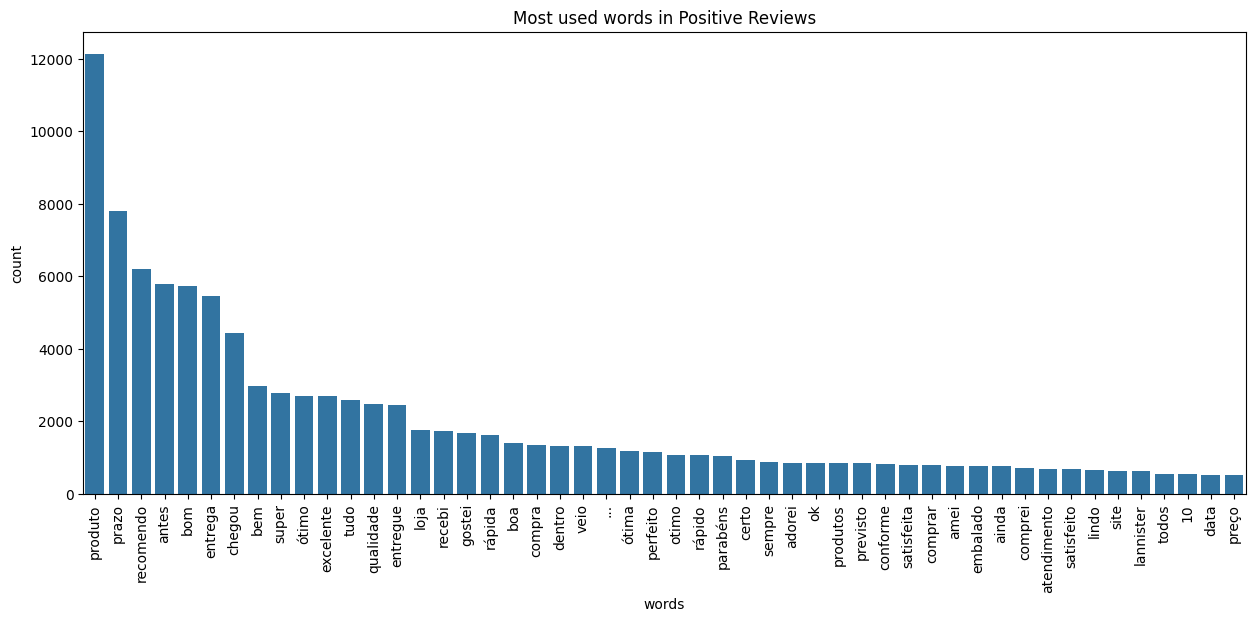

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Most used words in Positive Reviews")
sns.barplot(data=most_frequent_positive_reviews_df.head(50),x="words",y="count")
plt.xticks(rotation=90)
plt.show()

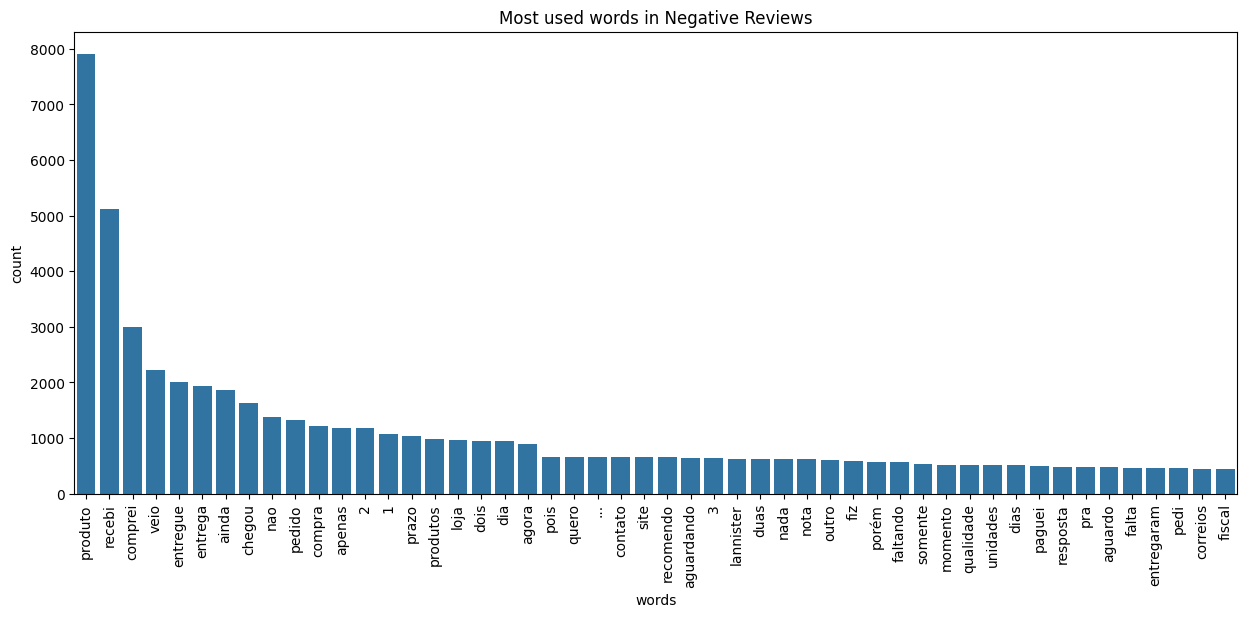

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Most used words in Negative Reviews")
sns.barplot(data=most_negative_reviews_df.head(50),x="words",y="count")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df['processed_review_text']
y = df['review_score'].apply(lambda x: 1 if x > 3 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# tokenizer - tool that breaks down a text into smaller units, typically words or subwordss.
# each words into tokens which individually has their own meaning

# oov_token='<OOV>' => out of vocabulary, to handle them by assigning special token to them
# num_words = 5000, maximum number of words to keep

# tokenizer.fit_on_texts(X_train) => fits the tokenizer on the training data. it updates internal vocabulary based on word frequencies in training data

# X_test_seq = tokenizer.texts_to_sequences(X_test) => convert text into sequence of integers

# pad_sequences = ensures all sequences have same length, if shorter it pads with zero

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

In [ ]:
# Embedding layer is used to convert integer indices into dense vectors of fixed size.
# dense vector where all elements are not zero
# a dense vector represents a high-dimensional vector where each dimension (or element) typically corresponds to a feature or attribute associated with a word.

"""
Sparse vectors may lose some information compared to dense vectors because
 they only capture the presence or absence of features (e.g., words), without encoding their relative importance or semantic relationships.
""";

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 100, 128)          640000    
                                                                 
 conv1d_18 (Conv1D)          (None, 96, 128)           82048     
                                                                 
 global_max_pooling1d_9 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                     

In [ ]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
1415/1415 [==============================] - 138s 97ms/step - loss: 0.3745 - accuracy: 0.8656 - val_loss: 0.3519 - val_accuracy: 0.8722
Epoch 2/5
1415/1415 [==============================] - 136s 96ms/step - loss: 0.3330 - accuracy: 0.8840 - val_loss: 0.3542 - val_accuracy: 0.8730
Epoch 3/5
1415/1415 [==============================] - 135s 95ms/step - loss: 0.3074 - accuracy: 0.8942 - val_loss: 0.3575 - val_accuracy: 0.8706
Epoch 4/5
1415/1415 [==============================] - 136s 96ms/step - loss: 0.2895 - accuracy: 0.9002 - val_loss: 0.3914 - val_accuracy: 0.8732
Epoch 5/5
1415/1415 [==============================] - 152s 108ms/step - loss: 0.2792 - accuracy: 0.9034 - val_loss: 0.4043 - val_accuracy: 0.8719


In [ ]:
y_train.value_counts()

review_score
1    67928
0    22576
Name: count, dtype: int64

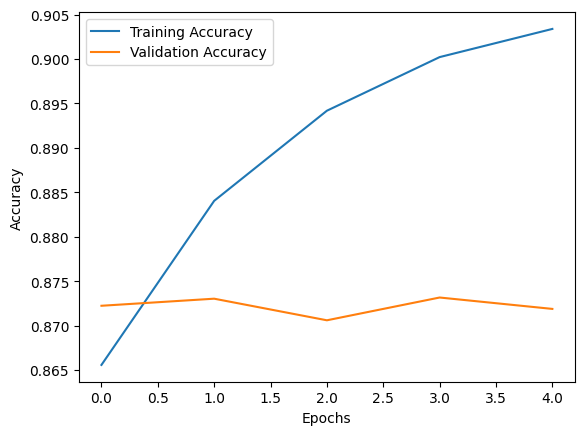

708/708 [==============================] - 9s 12ms/step - loss: 0.4043 - accuracy: 0.8719
Test Loss: 0.40429025888442993
Test Accuracy: 0.8718787431716919


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate model on test data
loss, accuracy = cnn_model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


In [ ]:
"""
GRU stands for Gated Recurrent Unit. It's a type of recurrent neural network (RNN) architecture that is designed to address the vanishing gradient problem,
which is common in traditional RNNs.
"""

# Gating Mechanisms: GRU has gating mechanisms that help control the flow of information within the network.
#These gating mechanisms decide which information to keep and which to discard, thus enabling the model to selectively learn long-term dependencies in sequential data.

"\nGRU stands for Gated Recurrent Unit. It's a type of recurrent neural network (RNN) architecture that is designed to address the vanishing gradient problem,\nwhich is common in traditional RNNs. \n"

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, GRU, Dense

max_len = 100
vocab_size = 10000
embedding_dim = 128 #each word will be represented in length of 300
num_units = 64

text_data = df["processed_review_text"]
labels = df['review_score'].apply(lambda x: 1 if x > 3 else 0)

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

embedding_layer = Embedding(vocab_size, embedding_dim, input_length=max_len)

gru_model = tf.keras.Sequential([
  embedding_layer,
  GRU(num_units, return_sequences=True),
  GRU(num_units),
  Dense(1, activation='sigmoid')
])

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_model.fit(padded_sequences, labels, epochs=5, validation_split=0.2)

test_sequences = tokenizer.texts_to_sequences(["nada"])
test_padded = pad_sequences(test_sequences, maxlen=max_len)
prediction = gru_model.predict(test_padded)

if prediction[0][0] > 0.5:
  print("Sentiment: Positive")
else:
  print("Sentiment: Negative")


Epoch 1/5
2829/2829 [==============================] - 401s 140ms/step - loss: 0.3619 - accuracy: 0.8692 - val_loss: 0.3576 - val_accuracy: 0.8687
Epoch 2/5
2829/2829 [==============================] - 414s 146ms/step - loss: 0.3290 - accuracy: 0.8839 - val_loss: 0.3625 - val_accuracy: 0.8683
Epoch 3/5
2829/2829 [==============================] - 393s 139ms/step - loss: 0.3110 - accuracy: 0.8921 - val_loss: 0.3786 - val_accuracy: 0.8665
Epoch 4/5
2829/2829 [==============================] - 417s 147ms/step - loss: 0.2981 - accuracy: 0.8967 - val_loss: 0.3881 - val_accuracy: 0.8641
Epoch 5/5
1/1 [==============================] - 1s 763ms/step
Sentiment: Negative


In [ ]:
test_sequences = tokenizer.texts_to_sequences(["recomendo"])
test_padded = pad_sequences(test_sequences, maxlen=max_len)
prediction = gru_model.predict(test_padded)

if prediction[0][0] > 0.5:
  print("Sentiment: Positive")
else:
  print("Sentiment: Negative")

1/1 [==============================] - 0s 41ms/step
Sentiment: Positive


# CNN-GRU MODEL

In [ ]:
from keras.layers import MaxPooling1D

In [ ]:
cnn_gru_model = Sequential()
cnn_gru_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
cnn_gru_model.add(Conv1D(64, 3, activation='relu'))
cnn_gru_model.add(MaxPooling1D(4))
cnn_gru_model.add(GRU(64, dropout=0.1, recurrent_dropout=0.5)) # defaults inclide tanh activation
cnn_gru_model.add(Dense(1, activation='sigmoid'))
cnn_gru_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 100, 128)          640000    
                                                                 
 conv1d_17 (Conv1D)          (None, 98, 64)            24640     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 gru_16 (GRU)                (None, 64)                24960     
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 689665 (2.63 MB)
Trainable params: 689665 (2.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [ ]:
cnn_gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = cnn_gru_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
1415/1415 [==============================] - 138s 94ms/step - loss: 0.4366 - accuracy: 0.8279 - val_loss: 0.3586 - val_accuracy: 0.8711
Epoch 2/5
1415/1415 [==============================] - 130s 92ms/step - loss: 0.3418 - accuracy: 0.8793 - val_loss: 0.3543 - val_accuracy: 0.8734
Epoch 3/5
1415/1415 [==============================] - 129s 91ms/step - loss: 0.3213 - accuracy: 0.8885 - val_loss: 0.3571 - val_accuracy: 0.8730
Epoch 4/5
1415/1415 [==============================] - 132s 93ms/step - loss: 0.3044 - accuracy: 0.8947 - val_loss: 0.3610 - val_accuracy: 0.8715
Epoch 5/5
1415/1415 [==============================] - 127s 90ms/step - loss: 0.2920 - accuracy: 0.8998 - val_loss: 0.3835 - val_accuracy: 0.8706


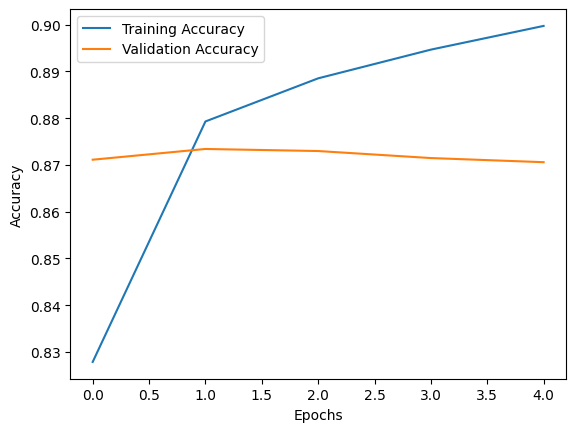

708/708 [==============================] - 9s 12ms/step - loss: 0.3835 - accuracy: 0.8706
Test Loss: 0.38348388671875
Test Accuracy: 0.8705970644950867


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = cnn_gru_model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

predictions = cnn_gru_model.predict(X_test_pad)
y_preds = np.round(predictions).astype(int)

accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

708/708 [==============================] - 8s 10ms/step
Accuracy: 87.06%
Precision: 87.00%
Recall: 97.34%
F1-score: 91.88%


In [ ]:
from sklearn.metrics import confusion_matrix

scores = {}

def get_metrics(model):

  predictions = model.predict(X_test_pad)
  y_preds = np.round(predictions).astype(int)

  accuracy = accuracy_score(y_test, y_preds)
  precision = precision_score(y_test, y_preds)
  recall = recall_score(y_test, y_preds)
  f1 = f1_score(y_test, y_preds)

  print(f"Accuracy: {accuracy * 100:.2f}%")
  print(f"Precision: {precision * 100:.2f}%")
  print(f"Recall: {recall * 100:.2f}%")
  print(f"F1-score: {f1 * 100:.2f}%")

  scores[model.__class__.name] = accuracy

  plt.title("Confusion Matrix")
  sns.heatmap(
      confusion_matrix(y_test,y_preds),
      annot=True,
      fmt="g"
  )
  plt.xlabel("Predicted Labels")
  plt.ylabel("Actual Labels")

708/708 [==============================] - 14s 20ms/step
Accuracy: 87.06%
Precision: 87.00%
Recall: 97.34%
F1-score: 91.88%


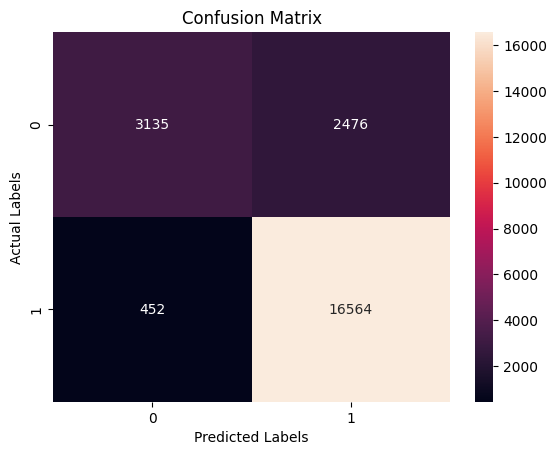

In [ ]:
get_metrics(cnn_gru_model)

708/708 [==============================] - 21s 30ms/step
Accuracy: 87.19%
Precision: 87.24%
Recall: 97.17%
F1-score: 91.94%


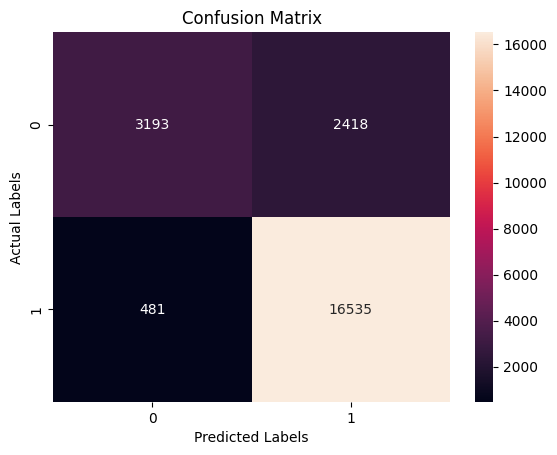

In [ ]:
get_metrics(cnn_model)

708/708 [==============================] - 24s 34ms/step
Accuracy: 75.20%
Precision: 75.20%
Recall: 100.00%
F1-score: 85.85%


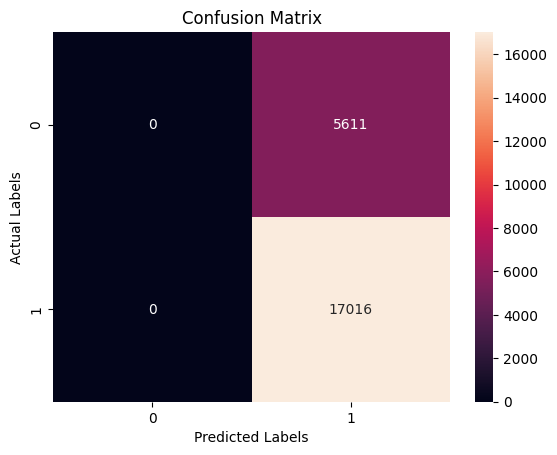

In [ ]:
get_metrics(gru_model)